In [21]:
print("Hello Wonderful Person")

Hello Wonderful Person


In [1]:
def filterLightCurves(lc):
    isGood = False
    for flux in lc.flux: 
        if flux < 0.95:
            isGood=True
            break

    return isGood
def openLCFile(f):
    return open(f).PDCSAP_FLUX.remove_outliers(sigma=5).normalize()

In [2]:
from lightkurve import TessLightCurve
from lightkurve.search import open 
import glob
import lightkurve as lk
lcFiles = [f for f in glob.glob("*lc.fits")]

In [6]:
LCs = list(map(openLCFile, lcFiles))
print(len(LCs))
filteredLCs = [lc for lc in LCs if filterLightCurves(lc)]
print(filteredLCs)

101
[TessLightCurve(TICID: 346783960), TessLightCurve(TICID: 25153759), TessLightCurve(TICID: 32068755), TessLightCurve(TICID: 38586438)]


In [4]:
#lc.query_solar_system_objects()

TIC 346783960
2.867000000000002 d
TIC 346783960 : Folding on period  2.867000000000002 d
TIC 25153759
TIC 25153759  was discarded due to low pg power 23.071461897230744
TIC 32068755
TIC 32068755  was discarded due to low pg power 25.331779448910936
TIC 38586438
1.1120000000000008 d
TIC 38586438 : Folding on period  1.1120000000000008 d


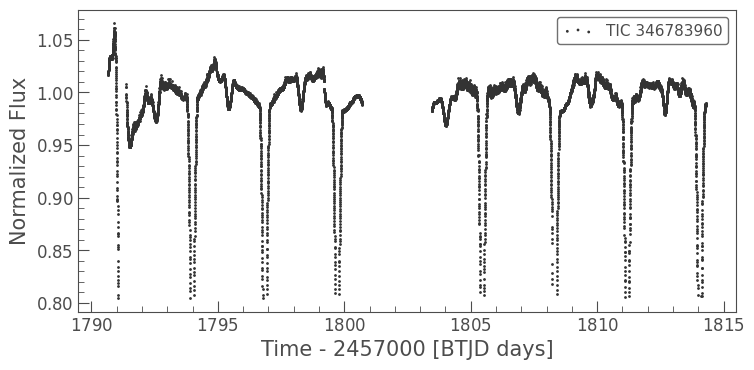

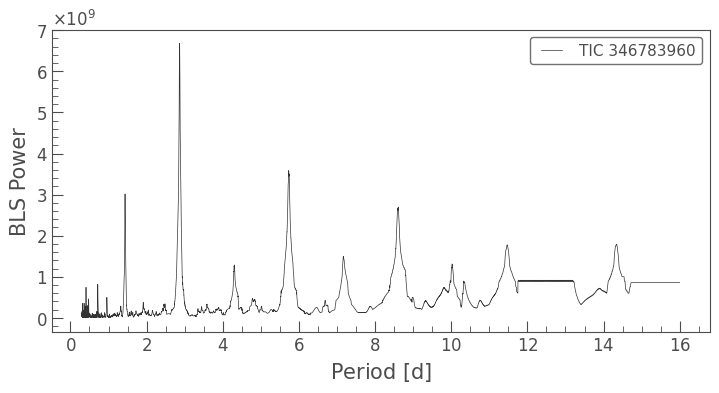

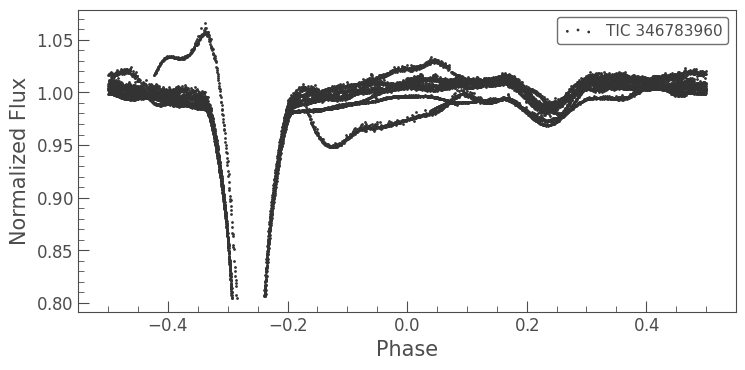

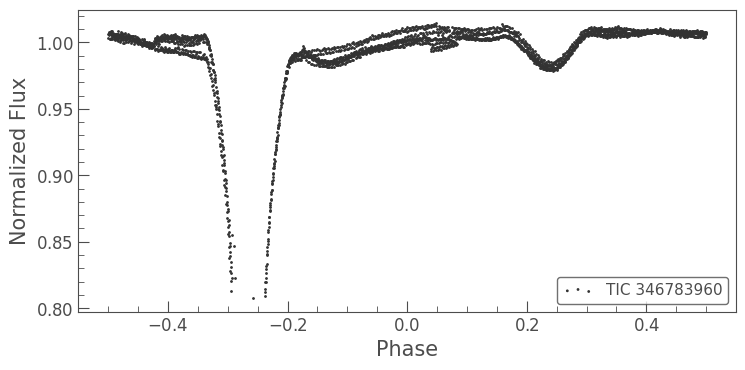

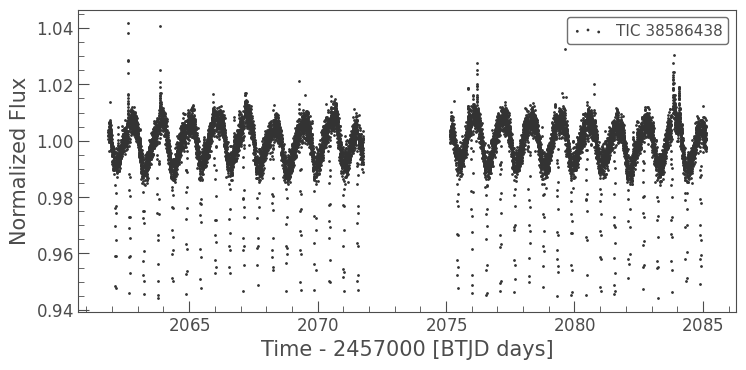

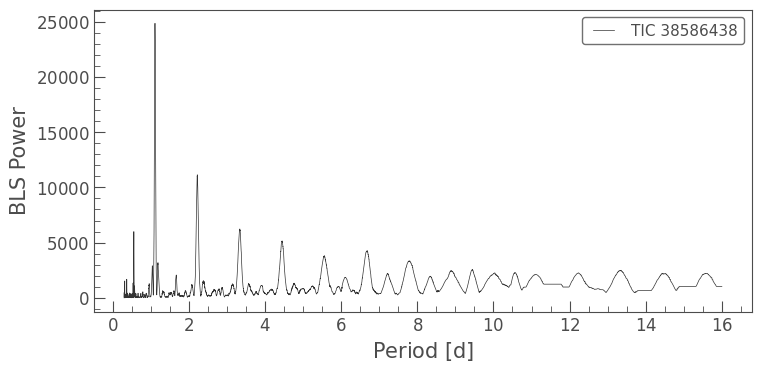

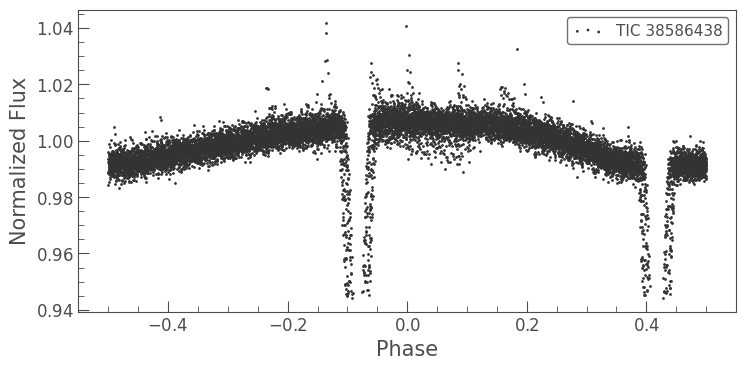

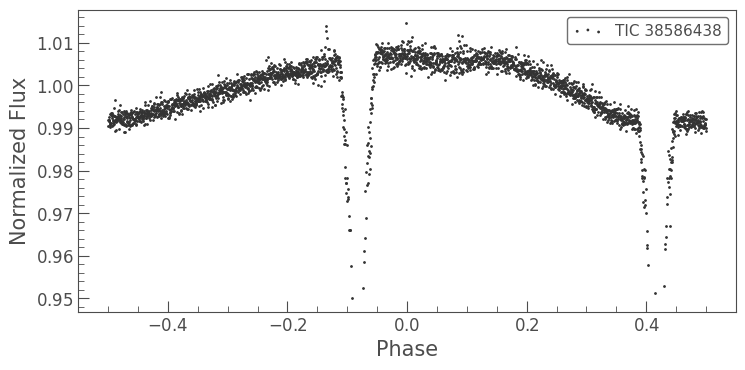

In [8]:
#mask = (lc.time < 2072) | (lc.time > 2075)
import numpy as np
for lc in filteredLCs:
    print(lc.label)
    
    #masked_lc = lc[mask]
    pg = lc.to_periodogram(method="bls", period=np.arange(0.3, 16, 0.001))
    if (pg.max_power > 100):
        print(pg.period_at_max_power)
        folded_lc = lc.fold(period=pg.period_at_max_power)
        binned_lc = folded_lc.bin(binsize=5)  # Average 5 points per bin
        lc.scatter()
        pg.plot()
        print(lc.label, ": Folding on period ", pg.period_at_max_power)
        folded_lc.scatter()
        binned_lc.scatter()
    else:
        print(lc.label, " was discarded due to low pg power", pg.max_power)
    